<a href="https://colab.research.google.com/github/Scar570/Object-Detection/blob/main/IITproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
coco_names = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush',
]

In [ ]:
import torchvision
import torchvision.transforms as transforms
import cv2
import torch
import numpy as np
from PIL import Image

In [ ]:
torchvision.models.detection.retinanet

<module 'torchvision.models.detection.retinanet' from '/usr/local/lib/python3.7/dist-packages/torchvision/models/detection/retinanet.py'>

In [ ]:
model=torchvision.models.efficientnet_b7(pretrained=False)
print(model)

EfficientNet(
  (features): Sequential(
    (0): ConvNormActivation(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): ConvNormActivation(
            (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
            (1): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(64, 16, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): ConvNormActivatio

In [ ]:
# this will help us create a different color for each class
COLORS = np.random.uniform(0, 255, size=(len(coco_names), 3))

In [ ]:
# define the torchvision image transforms
transform = transforms.Compose([
    transforms.ToTensor(),
])

In [ ]:
def predict(image, model, device, detection_threshold):
    # transform the image to tensor
    image = transform(image).to(device)
    image = image.unsqueeze(0) # add a batch dimension
    outputs = model(image) # get the predictions on the image
    # print the results individually
    # print(f"BOXES: {outputs[0]['boxes']}")
    # print(f"LABELS: {outputs[0]['labels']}")
    # print(f"SCORES: {outputs[0]['scores']}")
    # get all the predicited class names
    pred_classes = [coco_names[i] for i in outputs[0]['labels'].cpu().numpy()]
    # get score for all the predicted objects
    pred_scores = outputs[0]['scores'].detach().cpu().numpy()
    # get all the predicted bounding boxes
    pred_bboxes = outputs[0]['boxes'].detach().cpu().numpy()
    # get boxes above the threshold score
    boxes = pred_bboxes[pred_scores >= detection_threshold].astype(np.int32)
    return boxes, pred_classes, outputs[0]['labels']

In [ ]:
def draw_boxes(boxes, classes, labels, image):
    # read the image with OpenCV
    image = cv2.cvtColor(np.asarray(image), cv2.COLOR_BGR2RGB)
    for i, box in enumerate(boxes):
        color = COLORS[labels[i]]
        cv2.rectangle(
            image,
            (int(box[0]), int(box[1])),
            (int(box[2]), int(box[3])),
            color, 1
        )
        cv2.putText(image, classes[i], (int(box[0]), int(box[1]-5)),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, color, 1,
                    lineType=cv2.LINE_AA)
    return image


In [ ]:
# download or load the model from disk
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True,
                                                    min_size=800)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:

# image_name=input("Enter the name of the image (e.g : /image_name.jpg) :")

In [ ]:
# file_path=r'/content/drive/MyDrive/Colab Notebooks/input'
image_path='/content/drive/MyDrive/Colab Notebooks/Dog&Cat.jpeg'

In [ ]:
# from PIL import Image
# import requests

# image_path = Image.open(requests.get('https://www.kahibati.com/media/catalog/product/cache/1/image/8ffa1e7eabdca2825fc9e574d2f1afaf/j/a/jail_kahi_front1.jpg', stream=True).raw)

In [ ]:
# image_path=file_path

# print(image_path)

In [ ]:
from google.colab.patches import cv2_imshow
# image = Image.open(image_path)
image=Image.open(image_path)
model.eval().to(device)

boxes, classes, labels = predict(image, model, device, 0.8)

In [ ]:
boxes, len(classes), len(labels)

(array([[  2,  69, 475, 399],
        [299, 165, 445, 320]], dtype=int32), 19, 19)

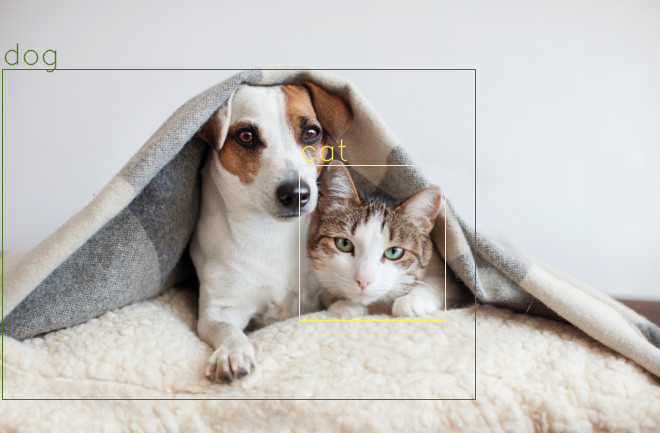

-1

In [ ]:
image = draw_boxes(boxes, classes, labels, image)
cv2_imshow(image)
save_name = f"{image_path.split('/')[-1].split('.')[0]}_{800}"
cv2.imwrite(f"outputs/{save_name}.jpg", image)
cv2.waitKey(0)